In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Employee-Attrition.csv")

In [3]:
pd.set_option('display.max_columns',None)
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
data.shape
data .head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Label Encoding

In [6]:
data['Attrition']=data['Attrition'].replace({'No':0,'Yes':1})
data['Gender']=data['Gender'].replace({'Male':0,'Female':1})
# data['OverTime'] = data['OverTime'].map({'No':0,'Yes':1})


# Check for null and duplicate values

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

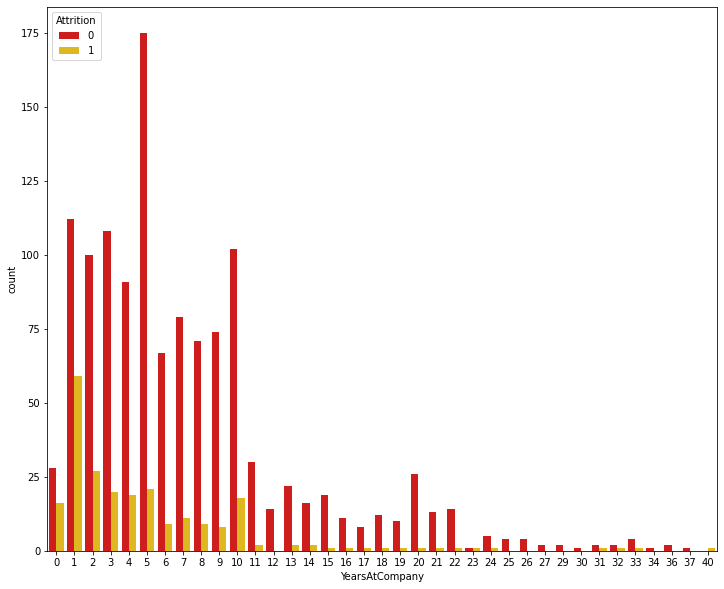

In [8]:
T=data['YearsAtCompany']
E=data['Attrition']
plt.figure(figsize=(12,10))
sns.countplot(x=T,hue=E,data=data,palette='hot')
plt.show()

# Data Visualization

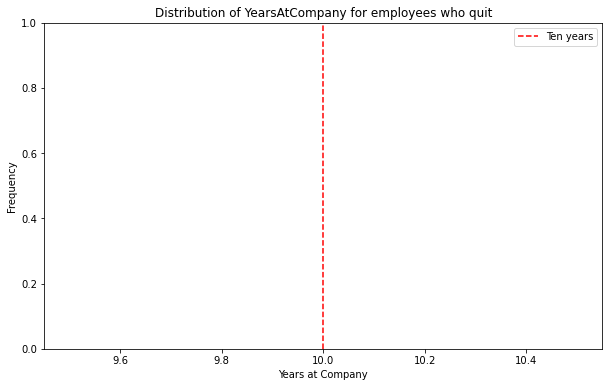

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Attrition'] == 'Yes']['YearsAtCompany'], bins=20, kde=True)
plt.title("Distribution of YearsAtCompany for employees who quit")
plt.xlabel("Years at Company")
plt.ylabel("Frequency")
plt.axvline(x=10, color='red', linestyle='--', label="Ten years")
plt.legend()
plt.show()

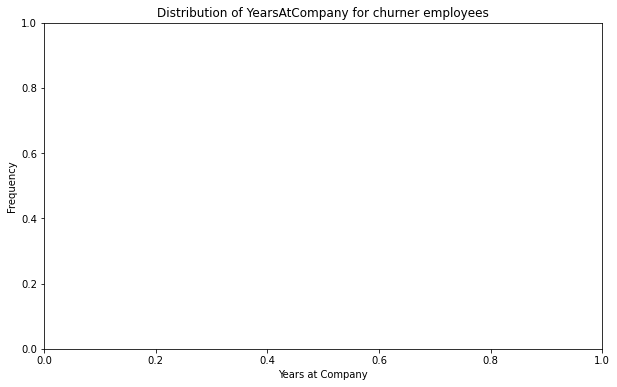

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Attrition'] == 'Yes']['YearsAtCompany'], bins=20, kde=True)
plt.title("Distribution of YearsAtCompany for churner employees")
plt.xlabel("Years at Company")
plt.ylabel("Frequency")
plt.show()


# Kaplan Meier Curve

<AxesSubplot:xlabel='timeline'>

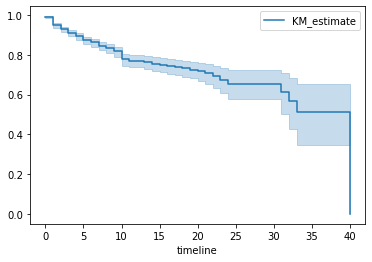

In [11]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

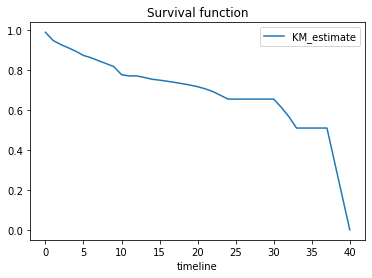

In [12]:
kmf.survival_function_.plot()
plt.title('Survival function')

<AxesSubplot:xlabel='timeline'>

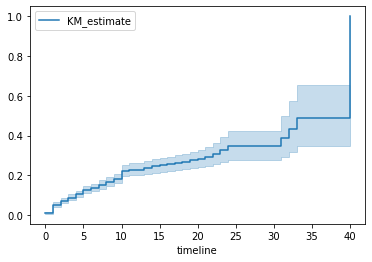

In [13]:
kmf.plot_cumulative_density()

# Median Survival Time and Confidence Intervals

In [14]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_

median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

print(median_)
print(median_confidence_interval_)

40.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    32.0                    40.0


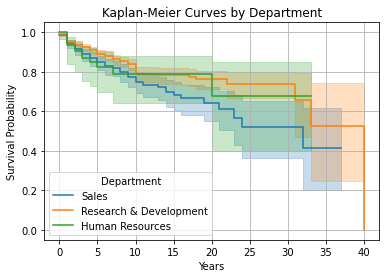

In [15]:
for department in data['Department'].unique():
    department_data = data[data['Department'] == department]
    kmf.fit(department_data['YearsAtCompany'], event_observed=department_data['Attrition'], label=department)
    kmf.plot()

plt.title('Kaplan-Meier Curves by Department')
plt.xlabel('Years')
plt.ylabel('Survival Probability')
plt.legend(title='Department')
plt.grid(True)
plt.show()



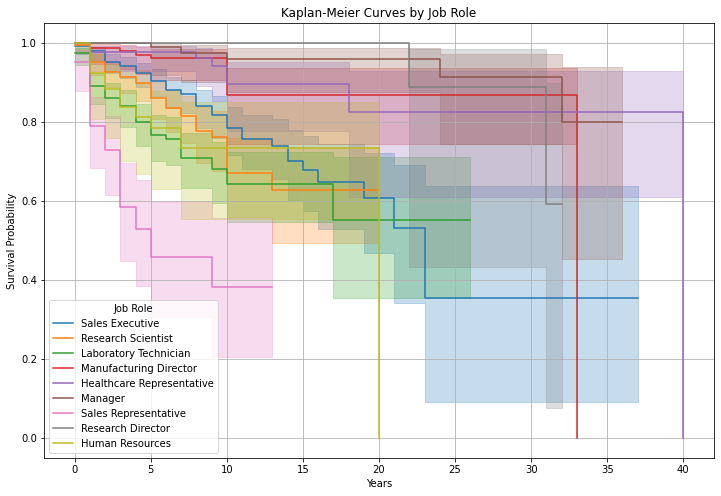

In [16]:
plt.figure(figsize=(12, 8))

for job in data['JobRole'].unique():
    department_data = data[data['JobRole'] == job]
    kmf.fit(department_data['YearsAtCompany'], event_observed=department_data['Attrition'], label=job)
    kmf.plot()


plt.title('Kaplan-Meier Curves by Job Role')
plt.xlabel('Years')
plt.ylabel('Survival Probability')
plt.legend(title='Job Role')
plt.grid(True)
plt.show()



# Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Over18','OverTime','Department','EducationField','JobRole','MaritalStatus']
label_encoders ={}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
   
    
data.info()
# data = pd.get_dummies(data, columns=['Department'], drop_first=True)
# data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

# Cox Hazard Model

In [18]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()

In [19]:
data=data.drop(['Over18', 'EmployeeCount', 'StandardHours','EmployeeNumber'], axis=1)

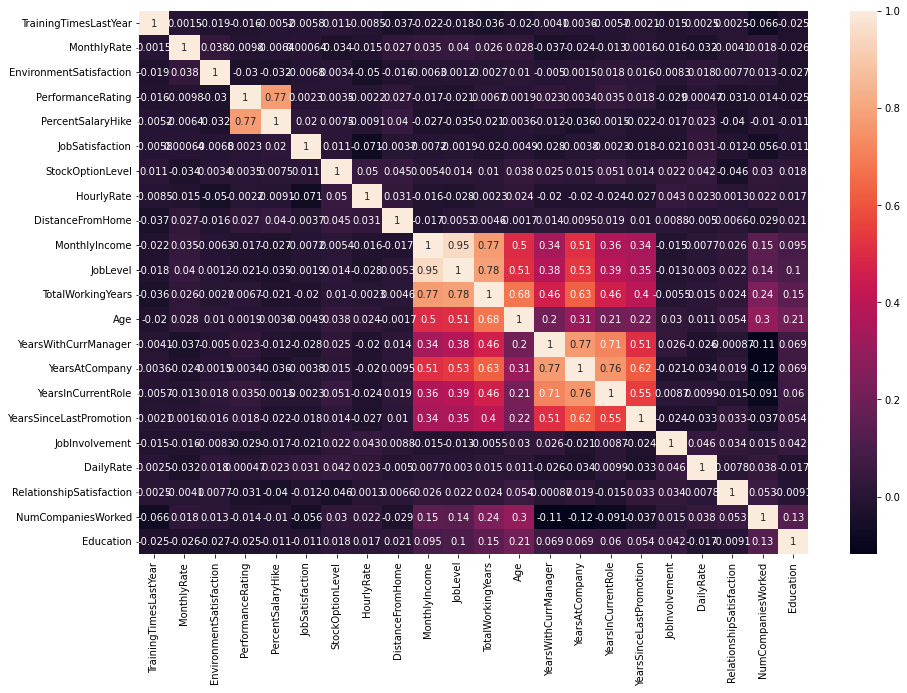

In [20]:
corr=data[['TrainingTimesLastYear','MonthlyRate','EnvironmentSatisfaction','PerformanceRating','PercentSalaryHike','JobSatisfaction','StockOptionLevel','HourlyRate','DistanceFromHome','MonthlyIncome','JobLevel','TotalWorkingYears','Age','YearsWithCurrManager','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','JobInvolvement','DailyRate','RelationshipSatisfaction','NumCompaniesWorked','Education']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr,annot=True)
plt.show()

In [21]:
# contingency_table = pd.crosstab(data['BusinessTravel'], data['MaritalStatus'],data['Attrition'],data['JobRole'],data['Department'],data['EducationField'],data['Gender'])
# cramers_v_value = cramers_v(contingency_table.values)

# print("Cramer's V:", cramers_v_value)

In [22]:
# After correlation matrix observation 
data=data.drop(['JobLevel','YearsInCurrentRole', 'YearsWithCurrManager','PercentSalaryHike','Department'],axis=1)

In [23]:
data.shape


(1470, 26)

## Train test split data

In [24]:
x=data.drop(['Attrition'],axis=1)
y=data['Attrition'].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
cph.fit(data, duration_col='YearsAtCompany', event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [27]:
print("Coefficients:")
print(cph.summary)

Coefficients:
                              coef  exp(coef)  se(coef)  coef lower 95%   
covariate                                                                 
Age                      -0.007094   0.992931  0.010216       -0.027116  \
BusinessTravel            0.063389   1.065441  0.098906       -0.130463   
DailyRate                -0.000188   0.999812  0.000165       -0.000512   
DistanceFromHome          0.025145   1.025464  0.007864        0.009731   
Education                -0.008634   0.991403  0.066659       -0.139284   
EducationField            0.018008   1.018171  0.049707       -0.079417   
EnvironmentSatisfaction  -0.264831   0.767335  0.060049       -0.382525   
Gender                   -0.328086   0.720301  0.139670       -0.601835   
HourlyRate               -0.002150   0.997852  0.003394       -0.008802   
JobInvolvement           -0.351208   0.703837  0.086724       -0.521184   
JobRole                   0.010831   1.010890  0.028555       -0.045136   
JobSatisfac

In [28]:
# hypothetical_employee = pd.DataFrame({
#     'Age': [40],
#     'BusinessTravel': [1],  # Male
#     'DailyRate': [50000],
#     'DistanceFromHome': [4],
#     'Education': [3],  # Years
#     'EducationFeild': [5],
#     'EnvironmentSatisfaction': [6],
#     'Gender': [4],
#     'HourlyRate': [2],
#     'JobInvolvement': [5],
#     'JobRole': [4],
#     'JobSatisfaction': [7],
#     'MaritalStatus': [10],
#     'MonthlyIncome': [15],
#     'MonthlyRate': [12],
#     'NumCompaniesWorked': [14],
#     'OverTime': [13],
#     'PerformancegRating': [11],
#     'RelationshipSatisfaction': [9],
#     'StockOptionlevel': [24],
#     'TotalWorkingHours': [20],
#     'TrainingTimesLastYear': [22],
#     'WorkLifebalance': [21],
#     'YearsSinceLastPromotion': [23]
# })
# prob_resignation = cph.predict_survival_function(hypothetical_employee, times=[1, 2, 3, 4, 5])  # Predict at specific time points
# print("\nProbability of resignation over time for the hypothetical employee:")
# print(prob_resignation)

In [29]:
test=pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1 non-null      int64 
 1   Attrition                 1 non-null      object
 2   BusinessTravel            1 non-null      object
 3   DailyRate                 1 non-null      int64 
 4   DistanceFromHome          1 non-null      int64 
 5   Education                 1 non-null      int64 
 6   EducationField            1 non-null      object
 7   EnvironmentSatisfaction   1 non-null      int64 
 8   Gender                    1 non-null      object
 9   HourlyRate                1 non-null      int64 
 10  JobInvolvement            1 non-null      int64 
 11  JobRole                   1 non-null      object
 12  JobSatisfaction           1 non-null      int64 
 13  MaritalStatus             1 non-null      object
 14  MonthlyIncome             1 no

In [30]:
data['Attrition']=data['Attrition'].replace({'No':0,'Yes':1})
data['Gender']=data['Gender'].replace({'Male':0,'Female':1})
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','OverTime','EducationField','JobRole','MaritalStatus','Gender']
label_encoders ={}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    test[column] = label_encoders[column].fit_transform(test[column])

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1 non-null      int64 
 1   Attrition                 1 non-null      object
 2   BusinessTravel            1 non-null      int32 
 3   DailyRate                 1 non-null      int64 
 4   DistanceFromHome          1 non-null      int64 
 5   Education                 1 non-null      int64 
 6   EducationField            1 non-null      int32 
 7   EnvironmentSatisfaction   1 non-null      int64 
 8   Gender                    1 non-null      int32 
 9   HourlyRate                1 non-null      int64 
 10  JobInvolvement            1 non-null      int64 
 11  JobRole                   1 non-null      int32 
 12  JobSatisfaction           1 non-null      int64 
 13  MaritalStatus             1 non-null      int32 
 14  MonthlyIncome             1 no

In [31]:
prob_resignation = cph.predict_survival_function(test, times=[1, 2, 3, 4, 5])  # Predict at specific time points
print("\nProbability of resignation over time for the hypothetical employee:")
print(prob_resignation)


Probability of resignation over time for the hypothetical employee:
            0
1.0  0.991399
2.0  0.986065
3.0  0.980116
4.0  0.972059
5.0  0.959089


In [48]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,2,1102,1,2,1,2,1,94,3,7,4,2,5993,19479,8,1,3,1,0,8,0,1,6,0
1,49,0,1,279,8,1,1,3,0,61,2,6,2,1,5130,24907,1,0,4,4,1,10,3,3,10,1
2,37,1,2,1373,2,2,4,4,0,92,2,2,3,2,2090,2396,6,1,3,2,0,7,3,3,0,0
3,33,0,1,1392,3,4,1,4,1,56,3,6,3,1,2909,23159,1,1,3,3,0,8,3,3,8,3
4,27,0,2,591,2,1,3,1,0,40,3,2,2,1,3468,16632,9,0,3,4,1,6,3,3,2,2
